# Домашняя работа №3

Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston. 

In [19]:
# !pip install tensorflow-addons
# !pip install tqdm

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
from copy import copy, deepcopy
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from sklearn.datasets import load_boston
from tensorflow.keras.models import Sequential  # Последовательность сети
from tensorflow.keras.layers import Dense  # Плотная нейронная сеть, полносвязная
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#### Загрузим датасет

In [2]:
boston = load_boston()
data = boston['data']
feature_names = boston['feature_names']
target = boston['target']

df = pd.DataFrame(data, columns=feature_names)
df = pd.concat([df, pd.Series(target, name='target')], axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
# Нормализуем
scaler = MinMaxScaler()
df_normalised = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_normalised

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778


In [4]:
X = df_normalised.drop(columns='target')
y = df_normalised['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Задание №1

Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston. 

#### Напишем функцию которая автоматизирует наше обучение

In [15]:
def fit_model(units=100, layers=2, optimizer='Adam', activation='relu', 
              metric=tfa.metrics.RSquare(), loss='mse',  batch_size=50, epochs=20):
    """
    Обучает модель взависимости о параметров 
    И возвращает accuracy
    
    Параметры:
    units : int
        Количество нейронов в скрытом слое
    layers : int
        Количество скрытых слоев
    optimizer : str
        Оптимизатор
    activation : str
        Функция активации для скрытых слоев 
    loss : str
        Функция потерь
    metric: str
        Метрика
    batch_size : int
        Размер батча
    epochs : int
        Кол-во эпох
    """
    # Частный случай с R2
    if isinstance(metric, str) and metric.lower()  == 'r2':
        metric = tfa.metrics.RSquare()
    # Собираем модель
    model = Sequential(name='Boston')
    # Первый слой по кол-ву входов
    model.add(Dense(X.shape[1], activation=activation, input_shape=(X.shape[1],)))
    if layers-2 > 0:
        for i in range(layers-2):  
            model.add(Dense(units, activation=activation))   
    model.add(Dense(1, activation='linear'))  # Только 1 выход, раз задача регрессии
    # Компилируем
    model.compile(optimizer=optimizer, # оптимизатор
                  loss=loss,
                  metrics=[metric]) # метрика
    # Обучим
    with tf.device("GPU:0"):
    # with tf.device("CPU:0"):
        model.fit(X_train,
                  y_train,
                  epochs=epochs,
                  batch_size=batch_size, 
                  verbose=0)
    metric_key = list(model.history.history.keys())    
    metric_key.remove('loss')
    metric_key = metric_key[0]
    metric_train = model.history.history[metric_key][-1]
    metric_test = model.evaluate(X_test, y_test, verbose=0)[1]
    return metric_train, metric_test, model 

### Поменяем число слоев

In [68]:
results_1 = {'layers': [],
             'r2_train': [],
             'r2_test': []}
_layers = np.arange(1, 10)
for layers in tqdm(_layers):
    (r2_train,
     r2_test,
     model) = fit_model(units=2, layers=layers, optimizer='Adam', activation='tanh', batch_size=50, epochs=100)
    results_1['layers'].append(layers)
    results_1['r2_train'].append(r2_train)
    results_1['r2_test'].append(r2_test)

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:34<00:00,  3.82s/it]


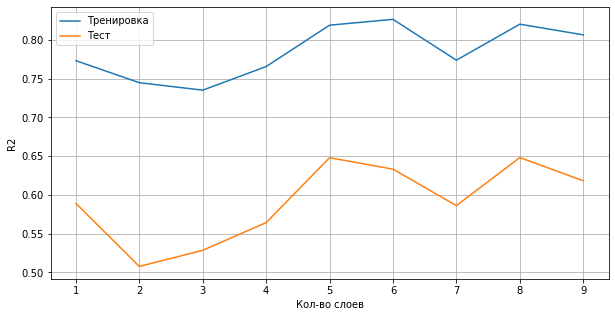

In [69]:
plt.figure(figsize=(10, 5))
plt.grid('On')
plt.ylabel('R2')
plt.xlabel('Кол-во слоев')
plt.plot(results_1['layers'], results_1['r2_train'], label = 'Тренировка')
plt.plot(results_1['layers'], results_1['r2_test'], label = 'Тест')
plt.legend()
plt.show()

**Оптимально - 5 слоев**

### Поменяем число нейронов

In [70]:
results_2 = {'units': [],
             'r2_train': [],
             'r2_test': []}
_units = np.arange(1, 100, 5)
for units in tqdm(_units):
    (r2_train,
     r2_test,
     model) = fit_model(units=units, layers=5, optimizer='Adam', activation='tanh', batch_size=50, epochs=100)
    results_2['units'].append(units)
    results_2['r2_train'].append(r2_train)
    results_2['r2_test'].append(r2_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:21<00:00,  4.08s/it]


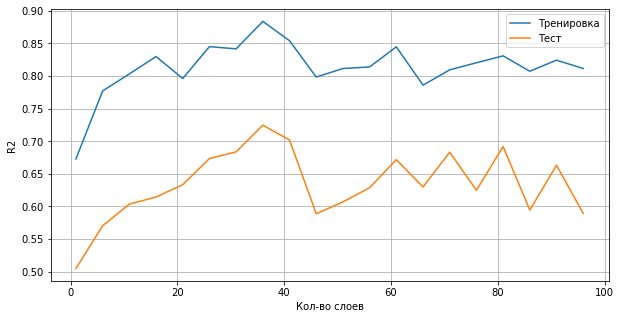

In [71]:
plt.figure(figsize=(10, 5))
plt.grid('On')
plt.ylabel('R2')
plt.xlabel('Кол-во слоев')
plt.plot(results_2['units'], results_2['r2_train'], label = 'Тренировка')
plt.plot(results_2['units'], results_2['r2_test'], label = 'Тест')
plt.legend()
plt.show()

**Впринципе, можно брать около 35**

### Поменяем типы активации

In [74]:
# Возьмем все известные, ради эксперимента
activations = ['elu', 'exponential', 'gelu', 'hard_sigmoid','linear', 'relu', 'selu',
               'sigmoid', 'softmax', 'softplus',  'softsign', 'swish', 'tanh']
results_3 = {'activation': [],
             'r2_train': [],
             'r2_test': []}

for activation in tqdm(activations):
    (r2_train,
     r2_test,
     model) = fit_model(units=10, layers=20, optimizer='Adam', activation=activation, batch_size=50, epochs=100)
    results_3['activation'].append(activation)
    results_3['r2_train'].append(r2_train)
    results_3['r2_test'].append(r2_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [02:13<00:00, 10.29s/it]


In [75]:
pd.DataFrame(results_3).sort_values('r2_test', ascending=False)

,activation,r2_train,r2_test
0,elu,0.890554,0.756430
11,swish,0.868971,0.721654
10,softsign,0.896109,0.715441
12,tanh,0.866135,0.713208
5,relu,0.890466,0.680969
2,gelu,0.886228,0.674405
9,softplus,0.792219,0.608948
6,selu,0.886642,0.598256
4,linear,0.758733,0.573882
7,sigmoid,-0.000388,-0.088576


**Здесь лучше себя показала "elu"**

### Поменяем оптимизаторы

In [76]:
# Возьмем все известные, ради эксперимента
optimizers = ['Adadelta','Adagrad','Adam','Adamax',
              'Ftrl', 'Nadam','RMSprop','SGD']
results_4 = {'optimizer': [],
             'r2_train': [],
             'r2_test': []}

for optimizer in tqdm(optimizers):
    (r2_train,
     r2_test,
     model) = fit_model(units=10, layers=20, optimizer=optimizer, activation='tanh', batch_size=50, epochs=100)
    results_4['optimizer'].append(optimizer)
    results_4['r2_train'].append(r2_train)
    results_4['r2_test'].append(r2_test)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [01:43<00:00, 12.94s/it]


In [77]:
pd.DataFrame(results_4).sort_values('r2_test', ascending=False)

,optimizer,r2_train,r2_test
2,Adam,0.843768,0.702956
5,Nadam,0.860189,0.696477
3,Adamax,0.843370,0.689314
6,RMSprop,0.833818,0.651136
7,SGD,0.725351,0.535904
1,Adagrad,-0.012457,-0.104185
4,Ftrl,-2.563553,-2.733963
0,Adadelta,-3.373441,-3.966139


## Задание №2
Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [29]:
# Загрузим лоссы
from tensorflow.keras.losses  import (LogCosh,
                                     MeanAbsoluteError,
                                     MAE,
                                     MSE,
                                     MSLE,
                                     log_cosh,
                                     logcosh,
                                     mae,
                                     mean_absolute_error,
                                     mean_squared_error,
                                     mean_squared_logarithmic_error,
                                     mse)

In [46]:
losses = ['LogCosh',
         'MeanAbsoluteError',
         'MAE',
         'MSE',
         'MSLE',
         'log_cosh',
         'logcosh',
         'mae',
         'mean_absolute_error',
         'mean_squared_error',
         'mean_squared_logarithmic_error',
         'mse']

In [24]:
from sklearn.metrics import r2_score

In [86]:
metrics = ['r2', 'mse', 'mae']
results_5 = {'metric': [],
             'loss': [],
             'r2_test': []}
for loss in tqdm(losses):
    for metric in metrics:    
        (metric_train,
         metric_test,
         model) = fit_model(units=35, layers=20, optimizer='Adam', activation='relu', 
                            metric=metric, loss=loss,  batch_size=50, epochs=100)
        y_pred = model.predict(X_test, verbose=0)
        r2_test = r2_score(y_test, y_pred)
        results_5['metric'].append(metric)
        results_5['loss'].append(loss)
        results_5['r2_test'].append(r2_test)    

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [05:19<00:00, 26.61s/it]


In [87]:
pd.DataFrame(results_5).sort_values('r2_test', ascending=False).reset_index(drop=True)

,metric,loss,r2_test
0,mae,MSE,0.799465
1,mae,logcosh,0.783052
2,r2,MAE,0.782481
3,r2,mean_squared_error,0.781702
4,r2,LogCosh,0.779966
5,r2,mse,0.774623
6,r2,mae,0.771898
7,mse,logcosh,0.768767
8,mse,mae,0.751789
9,mae,mean_squared_logarithmic_error,0.751554


### Оптимальный вариант который подобрал я

In [93]:
(metric_train,
 metric_test,
 model) = fit_model(units=35, layers=30, optimizer='Adam', activation='relu', 
                    metric='r2', loss='MSE',  batch_size=50, epochs=100)
y_pred = model.predict(X_test, verbose=0)
r2_test = r2_score(y_test, y_pred)
r2_test

0.7166909185276544

#### Вывод:
- В процессе ручной подстройки я понял что увеличение количества эпох дает более стабильные результаты, а иначе они получаются очень разными
- Adam - хороший оптимизатор для той задачи
- Loss MSE тоже отлично справляется
- Лучше ее решать с помощью машинного обучения, нейросеть для нее это очень дорого()